In [4]:
#Takes the peaks and stores them as fingerprints
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion 
from scipy.ndimage.morphology import iterate_structure

In [5]:
# TESTING
# running this cell loads the PCM-encoded data for the trumpet clip
with open("../Vicious_Vishnus/data/piano.txt", 'r') as R:
    trumpet_audio = np.asarray([int(i) for i in R])
    
sampling_rate = 44100 # sampling rate in Hz

<IPython.core.display.Javascript object>


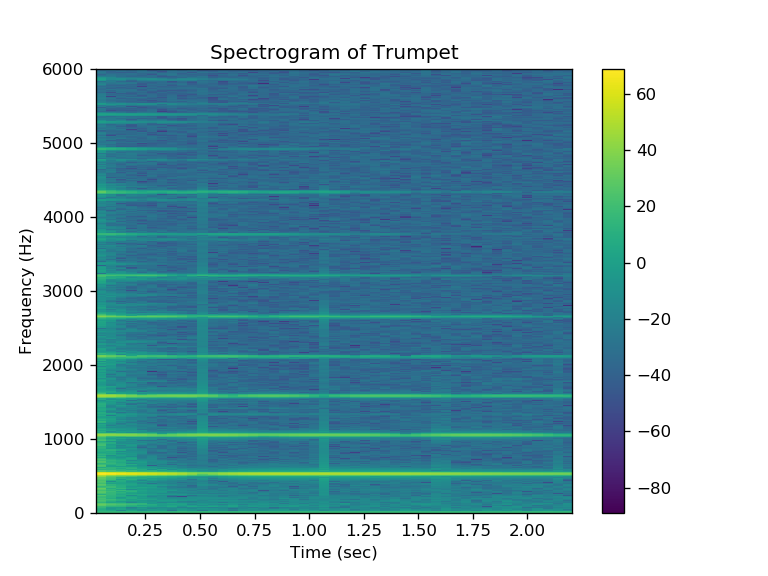

[ 37  36  34 ..., 246 262 275]


In [7]:
# TESTING

fig, ax = plt.subplots()

S, freqs, times, im = ax.specgram(trumpet_audio, NFFT=4096, Fs=sampling_rate,
                                  window=mlab.window_hanning,
                                  noverlap=4096 // 2)
fig.colorbar(im)

print(trumpet_audio)

ax.set_xlabel("Time (sec)")
ax.set_ylabel("Frequency (Hz)")
ax.set_title("Spectrogram of Trumpet")
ax.set_ylim(0, 6000);

In [8]:
def spectrogram_to_peaks(arr):
    """ 
    Creates a boolean array showing peaks, given data from a spectrogram.
    
    Parameters:
        arr: The array produced by the spectrogram from digital_to_spectrogram with shape (N,M)
        
    Returns:
        peaks: A boolean array with shape (N,M). Peaks in the data are where peaks == True.
    """
    # Creating the histogram
    arr_flattened = np.log(arr.flatten())
    N = arr_flattened.size # Number of elements in the array
    cnt, bin_edges = np.histogram(arr_flattened, bins=N//200, density=True)
    bin_width = np.diff(bin_edges) 
    
    ## print(np.sum(cnt*bin_width)) # check that summation = 1
    
    # Creating the cumulative distribution
    cumulative_distr = np.cumsum(cnt*bin_width)
    
    # Defining the cutoff
    frac_cut = 0.9
    bin_index_of_cutoff = np.searchsorted(cumulative_distr, frac_cut)
    
    # given the bin-index, we want the associated log-amplitude value for that bin
    cutoff_log_amplitude = bin_edges[bin_index_of_cutoff]
    
    # Defining the footprint
    fp = generate_binary_structure(rank=2,connectivity=2)
    
    peaks = ((arr > cutoff_log_amplitude) & (arr == maximum_filter(arr, footprint=fp)))
    
    return peaks

In [9]:
peaks = spectrogram_to_peaks(S)

In [37]:
import pickle
def peaks_to_dic_newsongs(local_peaks):
    with open("songs.pkl", mode="rb") as opened_file:
        song_dic = pickle.load(opened_file)
    freq, time= np.where(local_peaks)
    song_name=input("Song Name= ")
    for i in range(len(local_peaks)-15):
        j=1
        while j<16:
            finger=(freq[i], freq[i+j], time[j]-time[i])
            j+=1
            song_dir=(song_name, time[i])
            song_dic.update([(finger, song_dir)])
    print(song_dic)
    with open("songs.pkl", mode="wb") as opened_file:
        pickle.dump(song_dic, opened_file)

In [39]:
#Testing


Song Name= asd
{(0, 0, 2): ('asd', 20), (0, 0, 4): ('asd', 18), (0, 0, 7): ('asd', 18), (0, 0, 9): ('asd', 18), (0, 0, 11): ('asd', 16), (0, 0, 13): ('asd', 16), (0, 0, 15): ('asd', 14), (0, 0, 17): ('asd', 14), (0, 0, 19): ('asd', 12), (0, 0, 21): ('asd', 10), (0, 0, 24): ('asd', 10), (0, 0, 26): ('asd', 8), (0, 0, 28): ('asd', 3), (0, 0, 30): ('asd', 1), (0, 0, 33): ('asd', 1), (0, 0, 0): ('asd', 22), (0, 0, 5): ('asd', 20), (0, 0, 22): ('asd', 12), (0, 0, 31): ('asd', 3), (0, 0, -2): ('asd', 22), (0, 0, 3): ('asd', 5), (0, 0, 20): ('asd', 5), (0, 0, 29): ('asd', 5), (0, 0, -5): ('asd', 25), (0, 0, -3): ('asd', 8), (0, 0, 6): ('asd', 16), (0, 0, 8): ('asd', 14), (0, 0, 10): ('asd', 12), (0, 0, 12): ('asd', 10), (0, 0, 14): ('asd', 8), (0, 0, 23): ('asd', 8), (0, 0, -7): ('asd', 25), (0, 0, -9): ('asd', 27), (0, 0, -4): ('asd', 22), (0, 0, -11): ('asd', 27), (0, 0, -6): ('asd', 22), (0, 3, 20): ('asd', 14), (0, 0, -13): ('asd', 29), (0, 0, -8): ('asd', 22), (0, 3, 15): ('asd', 16), (0